In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

%config Completer.use_jedi = False
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Dataset 
Dataset_training = pd.read_csv("train_ctrUa4K.csv")
print(Dataset_training)
Dataset_test = pd.read_csv("test_lAUu6dG.csv")
print(Dataset_test)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

## Variables types 

In [4]:
Dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
Dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
#I check who are categorical and who are numerical 
Dataset_training["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [7]:
#Loan_Amount_Term,Credit_History is categorical 
#trainning
Dataset_training['Loan_Amount_Term'] = Dataset_training['Loan_Amount_Term'].astype("category")
Dataset_training['Credit_History'] = Dataset_training['Credit_History'].astype("category")
print(Dataset_training.info())
#test
Dataset_test['Loan_Amount_Term'] = Dataset_test['Loan_Amount_Term'].astype("category")
Dataset_test['Credit_History'] = Dataset_test['Credit_History'].astype("category")
print(Dataset_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    object  
 2   Married            611 non-null    object  
 3   Dependents         599 non-null    object  
 4   Education          614 non-null    object  
 5   Self_Employed      582 non-null    object  
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    category
 10  Credit_History     564 non-null    category
 11  Property_Area      614 non-null    object  
 12  Loan_Status        614 non-null    object  
dtypes: category(2), float64(2), int64(1), object(8)
memory usage: 54.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data co

## Missing value

In [8]:
#Datos entrenamiento 

#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_training.isnull().sum().sort_values(ascending=False)
percent = (Dataset_training.isnull().sum()/Dataset_training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


Categorical value le aplico la moda

Numerical feature aplico mediana

In [9]:
Dataset_training["Credit_History"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: category
Categories (2, float64): [0.0, 1.0]

In [10]:
Dataset_training["Self_Employed"]

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [11]:
#Numerical
Dataset_training["LoanAmount"]

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [12]:
Dataset_training["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [13]:
#Categorical
Dataset_training["Loan_Amount_Term"].unique()

[360.0, 120.0, 240.0, NaN, 180.0, ..., 300.0, 480.0, 36.0, 84.0, 12.0]
Length: 11
Categories (10, float64): [360.0, 120.0, 240.0, 180.0, ..., 480.0, 36.0, 84.0, 12.0]

In [14]:
#Married 
Dataset_training["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
#Categorical value
col_categ = ["Credit_History", "Self_Employed","Loan_Amount_Term","Gender","Dependents"]
Dataset_training[col_categ] = Dataset_training.groupby("Property_Area")[col_categ].transform(lambda x: x.fillna(x.mode()[0]))

In [16]:
col_numer = ["LoanAmount"]
Dataset_training[col_numer] = Dataset_training.groupby("Property_Area")[col_numer].transform(lambda x: x.fillna(x.median()))

In [17]:
#Eliminate nan value rows of married 
Dataset_training=Dataset_training.dropna(subset=['Married'])

In [18]:
#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_training.isnull().sum().sort_values(ascending=False)
percent = (Dataset_training.isnull().sum()/Dataset_training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


In [19]:
Dataset_training

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
#Test entrenamiento 

#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_test.isnull().sum().sort_values(ascending=False)
percent = (Dataset_test.isnull().sum()/Dataset_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Credit_History,29,0.079019
Self_Employed,23,0.062670
Gender,11,0.029973
Dependents,10,0.027248
Loan_Amount_Term,6,0.016349
LoanAmount,5,0.013624
Loan_ID,0,0.000000
Married,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [21]:
#Categorical value
col_categ = ["Credit_History", "Self_Employed","Loan_Amount_Term","Gender","Dependents"]
Dataset_test[col_categ] = Dataset_test.groupby("Property_Area")[col_categ].transform(lambda x: x.fillna(x.mode()[0]))

col_numer = ["LoanAmount"]
Dataset_test[col_numer] = Dataset_test.groupby("Property_Area")[col_numer].transform(lambda x: x.fillna(x.median()))

In [22]:
#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_test.isnull().sum().sort_values(ascending=False)
percent = (Dataset_test.isnull().sum()/Dataset_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


In [23]:
Dataset_test.shape

(367, 12)

I solve all missing values

## Variable dependiente

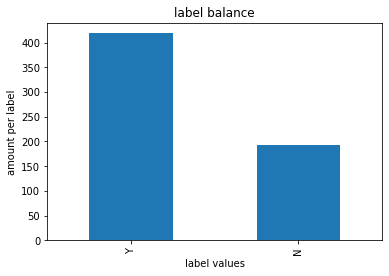

In [24]:
def class_balance(Train):
    
    Train.value_counts().plot(kind='bar')
    plt.title('label balance')
    plt.xlabel('label values')
    plt.ylabel('amount per label')
    plt.show()
    
class_balance(Dataset_training["Loan_Status"])  

It is seen the the classes are not balance. Oversampling is better than undersampling because with undersampling you loss a lot of information. 

In [25]:
Yes=400/600
print(Yes)
No=200/600
print(No)

0.6666666666666666
0.3333333333333333


I am going to try doing without oversampling and undersamplig to see what happens

## Standarization and Scaling of Numerical features

In [26]:
Dataset_training

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
#trainning
from sklearn.preprocessing import StandardScaler 
#Hago standarization and scaling 
Colnombres = Dataset_training.select_dtypes(exclude=["object","category"]).columns
sc = StandardScaler()
Dataset_training[Colnombres] =sc.fit_transform(Dataset_training[Colnombres])

Dataset_training.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.073496,-0.555746,-0.304269,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,-0.133510,-0.040955,-0.209333,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.392350,-0.555746,-0.945088,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.460534,0.249212,-0.304269,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.098187,-0.555746,-0.055062,360.0,1.0,Urban,Y


In [28]:
Dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             367 non-null    object  
 2   Married            367 non-null    object  
 3   Dependents         367 non-null    object  
 4   Education          367 non-null    object  
 5   Self_Employed      367 non-null    object  
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         367 non-null    float64 
 9   Loan_Amount_Term   367 non-null    category
 10  Credit_History     367 non-null    category
 11  Property_Area      367 non-null    object  
dtypes: category(2), float64(1), int64(2), object(7)
memory usage: 30.0+ KB


In [29]:
#test
from sklearn.preprocessing import StandardScaler 
#Hago standarization and scaling 
Colnombres = Dataset_test.select_dtypes(exclude=["object","category"]).columns
sc = StandardScaler()
Dataset_test[Colnombres] =sc.fit_transform(Dataset_test[Colnombres])

Dataset_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,0.186461,-0.673335,-0.426846,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,-0.352692,-0.029848,-0.164020,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,0.039641,0.098849,1.182964,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,-0.502774,0.418877,-0.591113,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,-0.311909,-0.673335,-0.952499,360.0,1.0,Urban


In [30]:
#I need to eliminate the loan_Amoun_term because it appears values in test set that doesnt appear in train set
Dataset_training=Dataset_training.drop(["Loan_Amount_Term"],axis=1)
Dataset_test=Dataset_test.drop(["Loan_Amount_Term"],axis=1)

## Binarization of qualitative features

In [31]:
Dataset_training=Dataset_training.drop(["Loan_ID"],axis=1)
Dataset_test=Dataset_test.drop(["Loan_ID"],axis=1)

In [32]:
Dataset_training

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.073496,-0.555746,-0.304269,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,-0.133510,-0.040955,-0.209333,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.392350,-0.555746,-0.945088,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.460534,0.249212,-0.304269,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.098187,-0.555746,-0.055062,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.408701,-0.555746,-0.885753,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,-0.211505,-0.555746,-1.253630,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,0.436984,-0.473816,1.274043,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,0.357027,-0.555746,0.490820,1.0,Urban,Y


In [33]:
Dataset_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,0.186461,-0.673335,-0.426846,1.0,Urban
1,Male,Yes,1,Graduate,No,-0.352692,-0.029848,-0.164020,1.0,Urban
2,Male,Yes,2,Graduate,No,0.039641,0.098849,1.182964,1.0,Urban
3,Male,Yes,2,Graduate,No,-0.502774,0.418877,-0.591113,1.0,Urban
4,Male,No,0,Not Graduate,No,-0.311909,-0.673335,-0.952499,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,-0.162439,0.088982,-0.377566,1.0,Urban
363,Male,Yes,0,Graduate,No,-0.132056,-0.369180,-0.344713,1.0,Urban
364,Male,No,0,Graduate,No,-0.317211,0.181644,-0.164020,1.0,Semiurban
365,Male,Yes,0,Graduate,No,0.039641,0.353241,0.361632,1.0,Rural


In [34]:
Dependent_variable=Dataset_training["Loan_Status"]
Dataset_training_Without_DV=Dataset_training.drop(["Loan_Status"],axis=1) 
Dataset_training_Without_DV=pd.get_dummies(Dataset_training_Without_DV)

Dataset_training_Without_DV

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.073496,-0.555746,-0.304269,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,-0.133510,-0.040955,-0.209333,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
2,-0.392350,-0.555746,-0.945088,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
3,-0.460534,0.249212,-0.304269,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
4,0.098187,-0.555746,-0.055062,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.408701,-0.555746,-0.885753,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0
610,-0.211505,-0.555746,-1.253630,0,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
611,0.436984,-0.473816,1.274043,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
612,0.357027,-0.555746,0.490820,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1


In [35]:
#Test
Dataset_test = pd.get_dummies(Dataset_test)

Dataset_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.426846,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1
1,-0.352692,-0.029848,-0.164020,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
2,0.039641,0.098849,1.182964,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
3,-0.502774,0.418877,-0.591113,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
4,-0.311909,-0.673335,-0.952499,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.377566,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1
363,-0.132056,-0.369180,-0.344713,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1
364,-0.317211,0.181644,-0.164020,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0
365,0.039641,0.353241,0.361632,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0


test and train dont have the same columns .... I checked.. there is more columns in test than in train

In [36]:
Dependent_variable

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 611, dtype: object

## Label Binazer

In [37]:
from sklearn import preprocessing
#Yes is 1 and no is 0
lb = preprocessing.LabelBinarizer()
Dependent_variable= lb.fit_transform(Dependent_variable)


In [38]:
Dependent_variable

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

## Intersection

In [39]:
train_cols = Dataset_training_Without_DV.columns
test_cols = Dataset_test.columns

common_cols = train_cols.intersection(test_cols)
Test_not_train = test_cols.difference(train_cols)

Test_not_train

Index([], dtype='object')

In [40]:
#Dataset_test=Dataset_test.drop(["Loan_Amount_Term_350.0","Loan_Amount_Term_6.0"],axis=1)

In [41]:
Dataset_training_Without_DV

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.073496,-0.555746,-0.304269,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,-0.133510,-0.040955,-0.209333,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
2,-0.392350,-0.555746,-0.945088,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
3,-0.460534,0.249212,-0.304269,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
4,0.098187,-0.555746,-0.055062,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.408701,-0.555746,-0.885753,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0
610,-0.211505,-0.555746,-1.253630,0,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
611,0.436984,-0.473816,1.274043,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
612,0.357027,-0.555746,0.490820,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1


In [42]:
Dataset_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.426846,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1
1,-0.352692,-0.029848,-0.164020,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
2,0.039641,0.098849,1.182964,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
3,-0.502774,0.418877,-0.591113,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
4,-0.311909,-0.673335,-0.952499,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.377566,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1
363,-0.132056,-0.369180,-0.344713,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1
364,-0.317211,0.181644,-0.164020,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0
365,0.039641,0.353241,0.361632,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0


## Models Implementation: StackingClassifier

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [44]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
xgb=XGBClassifier()
dtc = DecisionTreeClassifier()

In [45]:
stc=StackingClassifier([("knn",knn),("rfc",rfc),("xgb",xgb),("dtc",dtc)],final_estimator=LogisticRegression(),passthrough=True,stack_method="predict_proba")

stc.fit(Dataset_training_Without_DV,Dependent_variable)

acc =accuracy_score(Dependent_variable, stc.predict(Dataset_training_Without_DV))
print(acc)

[19:31:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [46]:
#0.8183 without oversampling and undersampling 

## Trying with oversampling

In [47]:
# Randomly over sample the minority class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(Dataset_training_Without_DV, Dependent_variable)

In [48]:
#Looking class balance
unique, counts = np.unique(y_train_ros, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 419]
 [  1 419]]


In [49]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
xgb=XGBClassifier()

stc=StackingClassifier([("knn",knn),("rfc",rfc),("xgb",xgb)],final_estimator=LogisticRegression(),passthrough=True,stack_method="predict_proba")
stc.fit(X_train_ros,y_train_ros)
acc =accuracy_score(y_train_ros, stc.predict(X_train_ros))
print(acc)

[19:31:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [50]:
#Eliminating outliers
from scipy.stats import zscore
df=pd.DataFrame(y_train_ros)
df_2=pd.DataFrame(stc.predict(X_train_ros))

residuos = df - df_2
outliers = residuos[np.abs(zscore(residuos)) > 3].index

outliers
#No outliers

Int64Index([], dtype='int64')

In [51]:
rfc = RandomForestClassifier()
xgb=XGBClassifier()
from sklearn.ensemble import GradientBoostingClassifier
estimator_GB = GradientBoostingClassifier()
from sklearn.ensemble import AdaBoostClassifier
ADB_model_default = AdaBoostClassifier()

stc=StackingClassifier([("ADB_model_default",ADB_model_default),("rfc",rfc),("xgb",xgb),("estimator_GB",estimator_GB)],final_estimator=LogisticRegression(),passthrough=True,stack_method="predict_proba")
stc.fit(X_train_ros,y_train_ros)
acc =accuracy_score(y_train_ros, stc.predict(X_train_ros))
print(acc)

[19:31:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:31:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [52]:
Prediction=stc.predict(Dataset_test)
Original_Prediction=lb.inverse_transform(Prediction)

In [53]:
#Sample_Submissions
Sample = pd.read_csv("sample_submission_49d68Cx.csv")
Sample["Loan_Status"]=Original_Prediction
Sample.to_csv('submission_3.csv', index=False)

In [ ]:
#Accuracy achieve was 80%

## Baggling classifier

In [66]:
#Baggling classifier 
from sklearn.ensemble import BaggingClassifier
xgb=XGBClassifier()
#Only one model
bag_model=BaggingClassifier(base_estimator=xgb, n_estimators=100, bootstrap=True)
bag_model.fit(X_train_ros,y_train_ros)
acc =accuracy_score(y_train_ros, stc.predict(X_train_ros))
print(acc)

[19:24:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:24:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:24:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:24:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [67]:
Prediction=bag_model.predict(Dataset_test)
Original_Prediction=lb.inverse_transform(Prediction)

In [68]:
#Sample_Submissions
Sample = pd.read_csv("sample_submission_49d68Cx.csv")
Sample["Loan_Status"]=Original_Prediction
Sample.to_csv('submission_4.csv', index=False)
#It is worst 75%